In [1]:
import os


if "original_dir" in globals():
    # current_dir = os.path.dirname(original_dir)
    current_dir = original_dir
    os.chdir(current_dir)
    print(f"Current directory: {current_dir}")
else:
    original_dir = os.getcwd()
    print(f"Current directory: {original_dir}")

os.chdir("../")
print(f"Changed directory: {os.getcwd()}")

Current directory: d:\northeastern\neu_dev\neumove_org\myoassist\docs
Changed directory: d:\northeastern\neu_dev\neumove_org\myoassist


In [2]:
import numpy as np
from myoassist_rl.rl_train.utils.data_types import DictionableDataclass
from myoassist_rl.rl_train.utils.environment_handler import EnvironmentHandler
from myoassist_rl.envs import myoassist_leg_imitation
from myoassist_rl.rl_train.utils.data_types import DictionableDataclass
from myoassist_rl.rl_train.utils.config import TrainSessionConfigBase
from myoassist_rl.envs import myoassist_leg_imitation_exo
from myoassist_rl.rl_train.utils.config_imiatation_exo import ExoImitationTrainSessionConfig

MyoSuite:> Registering Myo Envs


In [3]:
config = EnvironmentHandler.get_session_config_from_path("myoassist_rl/rl_train/train_configs/imitation_tutorial_22_separated_net.json", ExoImitationTrainSessionConfig)
config.env_params.env_id = "myoAssistLegImitationExo-v0"
config.env_params.model_path = "models/22muscle_2D/myoLeg22_2D_BASELINE.xml"
config.env_params.safe_height = 0.0
config.env_params.out_of_trajectory_threshold = 0.3
config.env_params.num_envs = 1

Loading config from myoassist_rl/rl_train/train_configs/imitation_tutorial_22_separated_net.json


# Load Reference Data

In [4]:
ref_data_dict = EnvironmentHandler.load_reference_data(config)


Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz


In [5]:
ref_data_dict["series_data"].keys()

dict_keys(['q_pelvis_tx', 'q_pelvis_tz', 'q_pelvis_ty', 'q_pelvis_tilt', 'q_pelvis_list', 'q_pelvis_rotation', 'q_hip_flexion_r', 'q_hip_adduction_r', 'q_hip_rotation_r', 'q_knee_angle_r', 'q_ankle_angle_r', 'q_subtalar_angle_r', 'q_mtp_angle_r', 'q_hip_flexion_l', 'q_hip_adduction_l', 'q_hip_rotation_l', 'q_knee_angle_l', 'q_ankle_angle_l', 'q_subtalar_angle_l', 'q_mtp_angle_l', 'q_lumbar_extension', 'q_lumbar_bending', 'q_lumbar_rotation', 'q_arm_flex_r', 'q_arm_add_r', 'q_arm_rot_r', 'q_elbow_flex_r', 'q_pro_sup_r', 'q_wrist_flex_r', 'q_wrist_dev_r', 'q_arm_flex_l', 'q_arm_add_l', 'q_arm_rot_l', 'q_elbow_flex_l', 'q_pro_sup_l', 'q_wrist_flex_l', 'q_wrist_dev_l', 'dq_pelvis_tx', 'dq_pelvis_tz', 'dq_pelvis_ty', 'dq_pelvis_tilt', 'dq_pelvis_list', 'dq_pelvis_rotation', 'dq_hip_flexion_r', 'dq_hip_adduction_r', 'dq_hip_rotation_r', 'dq_knee_angle_r', 'dq_ankle_angle_r', 'dq_subtalar_angle_r', 'dq_mtp_angle_r', 'dq_hip_flexion_l', 'dq_hip_adduction_l', 'dq_hip_rotation_l', 'dq_knee_angle

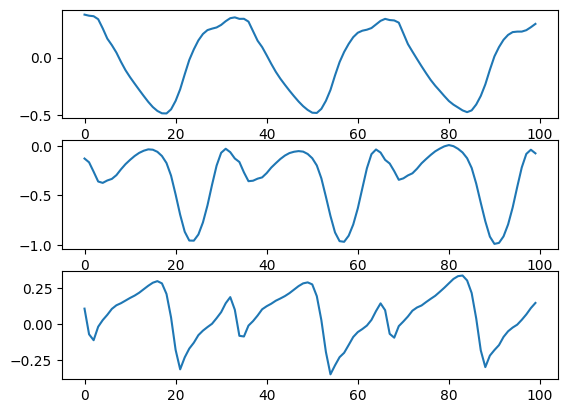

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1)
axs[0].plot(ref_data_dict["series_data"]["q_hip_flexion_r"][:100])
axs[1].plot(ref_data_dict["series_data"]["q_knee_angle_r"][:100])
axs[2].plot(ref_data_dict["series_data"]["q_ankle_angle_r"][:100])


# Follow reference motion

In [7]:
def follow_ref_and_render(config, num_frames=60):
    envw = EnvironmentHandler.create_environment(config, False)
    env:myoassist_leg_imitation.MyoAssistLegImitation = envw.unwrapped
    env.reset(seed=0)
    frames = []
    for step in range(60):
        env.imitation_step(True, step)
        
        frame = env.sim.renderer.render_offscreen(camera_id=1,
                                                    width=1920//2,
                                                    height=1080//2)
        frames.append(frame)

    import mediapy
    mediapy.show_video(frames, fps=30)
    env.close()

In [8]:
config.env_params.reference_data_keys = ["ankle_angle_l", "ankle_angle_r",
                                "hip_flexion_l", "hip_flexion_r",
                                "knee_angle_l", "knee_angle_r",
                                "pelvis_tilt",
                                "pelvis_tx", "pelvis_ty"
                                ]
follow_ref_and_render(config, 60)

Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz
config.env_params.env_id='myoAssistLegImitationExo-v0'
=================environment seed: 1234=====================
=================environment model_path: models/22muscle_2D/myoLeg22_2D_BASELINE.xml=====================
    NeuMove MyoLegBase
    
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=1.0, muscle_activation_penalty=0.1, muscle_activation_diff_penalty=0.1, footstep_delta_time=0.0, average_velocity_per_step=0.0, muscle_activation_penalty_per_step=0.0, joint_constraint_force_penalty=1.0, foot_force_penalty=0.5, qpos_imitation_rewards={'pelvis_ty': 0.1, 'pelvis_tilt': 1.0, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'knee_angle_l': 1.0, 'knee_angle_r': 1.0, 'ankle_angle_l': 0.2, 'ankle_angle_r': 0.2}, qvel_imitation_rewards={'pelvis_ty': 0.1, 'pelvis_tilt': 0.1, 'hip_flexion_l': 0

In [9]:
config.env_params.reference_data_keys = ["ankle_angle_l", #"ankle_angle_r",
                                "hip_flexion_l", #"hip_flexion_r",
                                # "knee_angle_l", "knee_angle_r",
                                "pelvis_tilt",
                                "pelvis_tx", "pelvis_ty"
                                ]
follow_ref_and_render(config, 60)

Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz
config.env_params.env_id='myoAssistLegImitationExo-v0'
=================environment seed: 1234=====================
=================environment model_path: models/22muscle_2D/myoLeg22_2D_BASELINE.xml=====================
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=1.0, muscle_activation_penalty=0.1, muscle_activation_diff_penalty=0.1, footstep_delta_time=0.0, average_velocity_per_step=0.0, muscle_activation_penalty_per_step=0.0, joint_constraint_force_penalty=1.0, foot_force_penalty=0.5, qpos_imitation_rewards={'pelvis_ty': 0.1, 'pelvis_tilt': 1.0, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'knee_angle_l': 1.0, 'knee_angle_r': 1.0, 'ankle_angle_l': 0.2, 'ankle_angle_r': 0.2}, qvel_imitation_rewards={'pelvis_ty': 0.1, 'pelvis_tilt': 0.1, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'k

In [10]:
envw = EnvironmentHandler.create_environment(config, False)
env:myoassist_leg_imitation.MyoAssistLegImitation = envw.unwrapped
env.reset(seed=0)
frames = []
for step in range(60):
    # obs, reward, done, truncated, info = env.step(np.zeros(env.action_space.shape))
    obs, reward, done, truncated, info = env.step(env.action_space.sample())
    # env.imitation_step(True)
    
    frame = env.sim.renderer.render_offscreen(camera_id=1,
                                                width=1920//4,
                                                height=1080//4)
    frames.append(frame)
env.close()
import mediapy
mediapy.show_video(frames, fps=30)

Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz
config.env_params.env_id='myoAssistLegImitationExo-v0'
=================environment seed: 1234=====================
=================environment model_path: models/22muscle_2D/myoLeg22_2D_BASELINE.xml=====================
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=1.0, muscle_activation_penalty=0.1, muscle_activation_diff_penalty=0.1, footstep_delta_time=0.0, average_velocity_per_step=0.0, muscle_activation_penalty_per_step=0.0, joint_constraint_force_penalty=1.0, foot_force_penalty=0.5, qpos_imitation_rewards={'pelvis_ty': 0.1, 'pelvis_tilt': 1.0, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'knee_angle_l': 1.0, 'knee_angle_r': 1.0, 'ankle_angle_l': 0.2, 'ankle_angle_r': 0.2}, qvel_imitation_rewards={'pelvis_ty': 0.1, 'pelvis_tilt': 0.1, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'k